<a href="https://colab.research.google.com/github/KillerStrike17/DeepLearning_for_NLP/blob/master/Recurrent_Neural_Networks_101/Time_Series_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [8]:
!nvidia-smi

Mon Feb  3 06:53:31 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    33W / 250W |    355MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
# Calling the gods

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

## Data Generation

Generating a random set of 1000 numbers

In [10]:
step = 4
N = 1000    
Tp = 800    

# Generating data with sine curve and adding some random value to it in range[2,-2]

t=np.arange(0,N)
# print("t:- ",t)
# print(np.random.rand(N))
x=np.sin(0.02*t)+2*np.random.rand(N)
# print(len(x))
df = pd.DataFrame(x)
df.head()

,0
0,0.900301
1,0.351975
2,0.651925
3,0.831095
4,0.701821


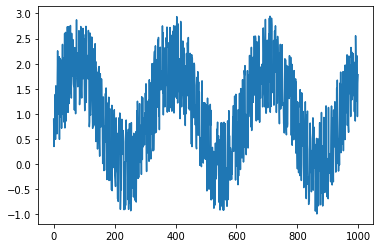

In [11]:
plt.plot(df)
plt.show()

## Dataset Generation

Splitting the data in 4 columns as step size is 4, and the target variable is fifth data 

In [0]:
# convert into dataset matrix
def convertToMatrix(data, step):
 X, Y =[], []
 # print(data)
 for i in range(len(data)-step):
  d=i+step 
  # print(d) 
  X.append(data[i:d,])
  Y.append(data[d,])
  # if i == 7:
  #   break
 return np.array(X), np.array(Y)

In [0]:
values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]


# print(test)
# add step elements into train and test

test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))
# print(train)


trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)

# print(trainX)
# print(trainX.shape)
# print(trainY)
# print(trainY.shape)

# print(testX)
# print(testX.shape)
# print(testY)
# print(testY.shape)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## Develop and Train the Model

Developed a simple RNN Network with loss as MSE

In [41]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
# model.add(SimpleRNN(units = 64,return_sequences=True))
# model.add(SimpleRNN(units = 32))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 32)                1184      
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(trainX,trainY,validation_data=(testX,testY), epochs=100, batch_size=32, verbose=1)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
print(testPredict.shape)
predicted=np.concatenate((trainPredict,testPredict),axis=0)
trainScore = model.evaluate(testX, testY, verbose=0)


Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 1s 693us/step - loss: 0.8384 - val_loss: 0.4199
Epoch 2/100
800/800 [==============================] - 0s 124us/step - loss: 0.4120 - val_loss: 0.4068
Epoch 3/100
800/800 [==============================] - 0s 141us/step - loss: 0.3961 - val_loss: 0.3925
Epoch 4/100
800/800 [==============================] - 0s 138us/step - loss: 0.3898 - val_loss: 0.3899
Epoch 5/100
800/800 [==============================] - 0s 141us/step - loss: 0.3862 - val_loss: 0.3862
Epoch 6/100
800/800 [==============================] - 0s 123us/step - loss: 0.3798 - val_loss: 0.3821
Epoch 7/100
800/800 [==============================] - 0s 126us/step - loss: 0.3771 - val_loss: 0.3795
Epoch 8/100
800/800 [==============================] - 0s 129us/step - loss: 0.3730 - val_loss: 0.3868
Epoch 9/100
800/800 [==============================] - 0s 129us/step - loss: 0.3749 - val_loss: 0.3770
Epoch 10/100
800/800 [=====

## Outputs using various Optimizers and final Plot using RMSProp

Applied various optimizers like RMSProp, Adagrad, Adam and Adadelta to check the difference and plotted the final output using RMSProp as it gave the least error rate

In [43]:
print(trainScore) # RMSProp

0.3811911261081696


In [45]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
# model.add(SimpleRNN(units = 64,return_sequences=True))
# model.add(SimpleRNN(units = 32))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adagrad')
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_8 (SimpleRNN)     (None, 32)                1184      
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(trainX,trainY,validation_data=(testX,testY), epochs=100, batch_size=32, verbose=1)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
print(testPredict.shape)
predicted=np.concatenate((trainPredict,testPredict),axis=0)
trainScore = model.evaluate(testX, testY, verbose=0)


Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 1s 833us/step - loss: 0.5088 - val_loss: 0.3753
Epoch 2/100
800/800 [==============================] - 0s 125us/step - loss: 0.3890 - val_loss: 0.3694
Epoch 3/100
800/800 [==============================] - 0s 131us/step - loss: 0.3873 - val_loss: 0.3664
Epoch 4/100
800/800 [==============================] - 0s 140us/step - loss: 0.3841 - val_loss: 0.3648
Epoch 5/100
800/800 [==============================] - 0s 126us/step - loss: 0.3809 - val_loss: 0.3645
Epoch 6/100
800/800 [==============================] - 0s 129us/step - loss: 0.3798 - val_loss: 0.3651
Epoch 7/100
800/800 [==============================] - 0s 127us/step - loss: 0.3779 - val_loss: 0.3633
Epoch 8/100
800/800 [==============================] - 0s 125us/step - loss: 0.3768 - val_loss: 0.3640
Epoch 9/100
800/800 [==============================] - 0s 129us/step - loss: 0.3750 - val_loss: 0.3649
Epoch 10/100
800/800 [=====

In [47]:
print(trainScore) #Adagrad

0.37687172830104826


In [49]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
# model.add(SimpleRNN(units = 64,return_sequences=True))
# model.add(SimpleRNN(units = 32))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_10 (SimpleRNN)    (None, 32)                1184      
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(trainX,trainY,validation_data=(testX,testY), epochs=100, batch_size=32, verbose=1)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
print(testPredict.shape)
predicted=np.concatenate((trainPredict,testPredict),axis=0)
trainScore = model.evaluate(testX, testY, verbose=0)


Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 1.0121 - val_loss: 0.4697
Epoch 2/100
800/800 [==============================] - 0s 146us/step - loss: 0.4313 - val_loss: 0.3774
Epoch 3/100
800/800 [==============================] - 0s 160us/step - loss: 0.3891 - val_loss: 0.3753
Epoch 4/100
800/800 [==============================] - 0s 142us/step - loss: 0.3833 - val_loss: 0.3718
Epoch 5/100
800/800 [==============================] - 0s 136us/step - loss: 0.3809 - val_loss: 0.3708
Epoch 6/100
800/800 [==============================] - 0s 131us/step - loss: 0.3799 - val_loss: 0.3686
Epoch 7/100
800/800 [==============================] - 0s 136us/step - loss: 0.3784 - val_loss: 0.3684
Epoch 8/100
800/800 [==============================] - 0s 130us/step - loss: 0.3780 - val_loss: 0.3681
Epoch 9/100
800/800 [==============================] - 0s 139us/step - loss: 0.3760 - val_loss: 0.3671
Epoch 10/100
800/800 [=======

In [51]:
print(trainScore) #Adam

0.391128850877285


In [52]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
# model.add(SimpleRNN(units = 64,return_sequences=True))
# model.add(SimpleRNN(units = 32))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adadelta')
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_11 (SimpleRNN)    (None, 32)                1184      
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(trainX,trainY,validation_data=(testX,testY), epochs=100, batch_size=32, verbose=1)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
print(testPredict.shape)
predicted=np.concatenate((trainPredict,testPredict),axis=0)
trainScore = model.evaluate(testX, testY, verbose=0)


Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 1s 1000us/step - loss: 0.4446 - val_loss: 0.3732
Epoch 2/100
800/800 [==============================] - 0s 140us/step - loss: 0.3887 - val_loss: 0.3614
Epoch 3/100
800/800 [==============================] - 0s 139us/step - loss: 0.3825 - val_loss: 0.3623
Epoch 4/100
800/800 [==============================] - 0s 138us/step - loss: 0.3826 - val_loss: 0.3584
Epoch 5/100
800/800 [==============================] - 0s 142us/step - loss: 0.3795 - val_loss: 0.3644
Epoch 6/100
800/800 [==============================] - 0s 146us/step - loss: 0.3790 - val_loss: 0.3604
Epoch 7/100
800/800 [==============================] - 0s 139us/step - loss: 0.3780 - val_loss: 0.3581
Epoch 8/100
800/800 [==============================] - 0s 143us/step - loss: 0.3749 - val_loss: 0.3591
Epoch 9/100
800/800 [==============================] - 0s 141us/step - loss: 0.3754 - val_loss: 0.3593
Epoch 10/100
800/800 [====

In [54]:
print(trainScore) #Adadelta

0.37745152711868285


(1000, 1)


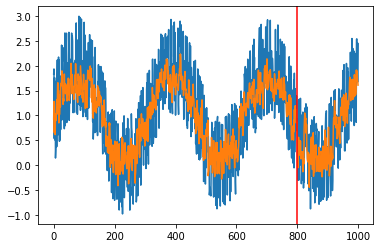

In [0]:
index = df.index.values
print(predicted.shape)
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show()

# Experiments


## Experiment 1

Increasing N to 2000 and Tp to 1600


In [14]:
step = 4
N = 2000    
Tp = 1600    

# Generating data with sine curve and adding some random value to it in range[2,-2]

t=np.arange(0,N)
# print("t:- ",t)
# print(np.random.rand(N))
x=np.sin(0.02*t)+2*np.random.rand(N)
# print(len(x))
df = pd.DataFrame(x)
df.head()

,0
0,0.572979
1,1.015416
2,1.512595
3,0.651320
4,1.250747


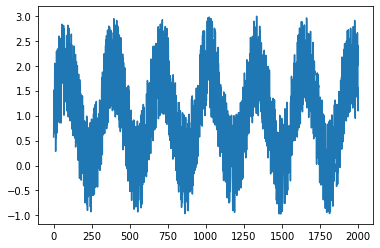

In [15]:
plt.plot(df)
plt.show()

In [0]:
# convert into dataset matrix
def convertToMatrix(data, step):
 X, Y =[], []
 # print(data)
 for i in range(len(data)-step):
  d=i+step 
  # print(d) 
  X.append(data[i:d,])
  Y.append(data[d,])
  # if i == 7:
  #   break
 return np.array(X), np.array(Y)

In [0]:
values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]


# print(test)
# add step elements into train and test

test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))
# print(train)


trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)

# print(trainX)
# print(trainX.shape)
# print(trainY)
# print(trainY.shape)

# print(testX)
# print(testX.shape)
# print(testY)
# print(testY.shape)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [18]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
# model.add(SimpleRNN(units = 64,return_sequences=True))
# model.add(SimpleRNN(units = 32))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 32)                1184      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(trainX,trainY,validation_data=(testX,testY), epochs=100, batch_size=32, verbose=1)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
print(testPredict.shape)
predicted=np.concatenate((trainPredict,testPredict),axis=0)
trainScore = model.evaluate(testX, testY, verbose=0)


Train on 1600 samples, validate on 400 samples
Epoch 1/100
1600/1600 [==============================] - 2s 1ms/step - loss: 1.4064 - val_loss: 0.4986
Epoch 2/100
1600/1600 [==============================] - 0s 137us/step - loss: 0.4475 - val_loss: 0.4199
Epoch 3/100
1600/1600 [==============================] - 0s 131us/step - loss: 0.4231 - val_loss: 0.4183
Epoch 4/100
1600/1600 [==============================] - 0s 142us/step - loss: 0.4183 - val_loss: 0.4020
Epoch 5/100
1600/1600 [==============================] - 0s 140us/step - loss: 0.4139 - val_loss: 0.4010
Epoch 6/100
1600/1600 [==============================] - 0s 130us/step - loss: 0.4119 - val_loss: 0.4097
Epoch 7/100
1600/1600 [==============================] - 0s 132us/step - loss: 0.4105 - val_loss: 0.3978
Epoch 8/100
1600/1600 [==============================] - 0s 135us/step - loss: 0.4100 - val_loss: 0.3990
Epoch 9/100
1600/1600 [==============================] - 0s 133us/step - loss: 0.4083 - val_loss: 0.3966
Epoch 10/1

(2000, 1)


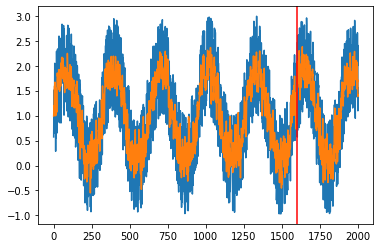

In [20]:
index = df.index.values
print(predicted.shape)
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show()

## Experiment 2

Increasing Steps to 40 from 4


In [22]:
step = 40
N = 1000    
Tp = 800    

# Generating data with sine curve and adding some random value to it in range[2,-2]

t=np.arange(0,N)
# print("t:- ",t)
# print(np.random.rand(N))
x=np.sin(0.02*t)+2*np.random.rand(N)
# print(len(x))
df = pd.DataFrame(x)
df.head()

,0
0,1.215605
1,1.239164
2,0.070558
3,0.768228
4,1.476377


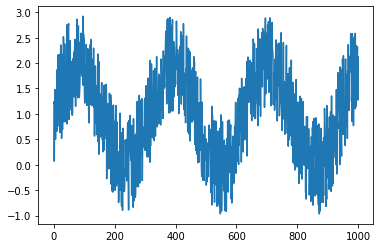

In [23]:
plt.plot(df)
plt.show()

In [0]:
# convert into dataset matrix
def convertToMatrix(data, step):
 X, Y =[], []
 # print(data)
 for i in range(len(data)-step):
  d=i+step 
  # print(d) 
  X.append(data[i:d,])
  Y.append(data[d,])
  # if i == 7:
  #   break
 return np.array(X), np.array(Y)

In [0]:
values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]


# print(test)
# add step elements into train and test

test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))
# print(train)


trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)

# print(trainX)
# print(trainX.shape)
# print(trainY)
# print(trainY.shape)

# print(testX)
# print(testX.shape)
# print(testY)
# print(testY.shape)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [38]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
# model.add(SimpleRNN(units = 64,return_sequences=True))
# model.add(SimpleRNN(units = 32))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 32)                1184      
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(trainX,trainY,validation_data=(testX,testY), epochs=100, batch_size=32, verbose=1)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
print(testPredict.shape)
predicted=np.concatenate((trainPredict,testPredict),axis=0)
trainScore = model.evaluate(testX, testY, verbose=0)


Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 1s 660us/step - loss: 2.8297 - val_loss: 1.2913
Epoch 2/100
800/800 [==============================] - 0s 127us/step - loss: 2.0577 - val_loss: 1.1154
Epoch 3/100
800/800 [==============================] - 0s 131us/step - loss: 1.7675 - val_loss: 0.8920
Epoch 4/100
800/800 [==============================] - 0s 135us/step - loss: 1.2679 - val_loss: 0.6506
Epoch 5/100
800/800 [==============================] - 0s 134us/step - loss: 0.8034 - val_loss: 0.4792
Epoch 6/100
800/800 [==============================] - 0s 130us/step - loss: 0.5145 - val_loss: 0.4162
Epoch 7/100
800/800 [==============================] - 0s 130us/step - loss: 0.4154 - val_loss: 0.4035
Epoch 8/100
800/800 [==============================] - 0s 132us/step - loss: 0.3963 - val_loss: 0.3927
Epoch 9/100
800/800 [==============================] - 0s 119us/step - loss: 0.3882 - val_loss: 0.3870
Epoch 10/100
800/800 [=====

(1000, 1)


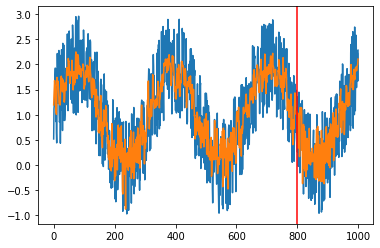

In [40]:
index = df.index.values
print(predicted.shape)
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show()

## Experiment 3

Changing activation to Tanh from relu


In [31]:
step = 4
N = 1000    
Tp = 800    

# Generating data with sine curve and adding some random value to it in range[2,-2]

t=np.arange(0,N)
# print("t:- ",t)
# print(np.random.rand(N))
x=np.sin(0.02*t)+2*np.random.rand(N)
# print(len(x))
df = pd.DataFrame(x)
df.head()

,0
0,0.515708
1,1.116524
2,1.200601
3,1.270023
4,1.746053


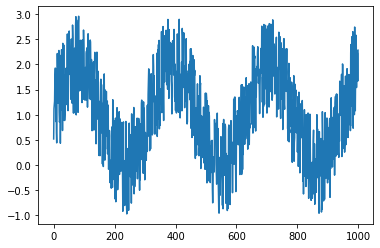

In [32]:
plt.plot(df)
plt.show()

In [0]:
# convert into dataset matrix
def convertToMatrix(data, step):
 X, Y =[], []
 # print(data)
 for i in range(len(data)-step):
  d=i+step 
  # print(d) 
  X.append(data[i:d,])
  Y.append(data[d,])
  # if i == 7:
  #   break
 return np.array(X), np.array(Y)

In [0]:
values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]


# print(test)
# add step elements into train and test

test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))
# print(train)


trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)

# print(trainX)
# print(trainX.shape)
# print(trainY)
# print(trainY.shape)

# print(testX)
# print(testX.shape)
# print(testY)
# print(testY.shape)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [35]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="tanh"))
# model.add(SimpleRNN(units = 64,return_sequences=True))
# model.add(SimpleRNN(units = 32))
model.add(Dense(8, activation="tanh")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 32)                1184      
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(trainX,trainY,validation_data=(testX,testY), epochs=100, batch_size=32, verbose=1)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
print(testPredict.shape)
predicted=np.concatenate((trainPredict,testPredict),axis=0)
trainScore = model.evaluate(testX, testY, verbose=0)


Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 1s 633us/step - loss: 0.4642 - val_loss: 0.4466
Epoch 2/100
800/800 [==============================] - 0s 149us/step - loss: 0.4121 - val_loss: 0.4162
Epoch 3/100
800/800 [==============================] - 0s 136us/step - loss: 0.4027 - val_loss: 0.4059
Epoch 4/100
800/800 [==============================] - 0s 148us/step - loss: 0.3981 - val_loss: 0.4030
Epoch 5/100
800/800 [==============================] - 0s 129us/step - loss: 0.3967 - val_loss: 0.4073
Epoch 6/100
800/800 [==============================] - 0s 131us/step - loss: 0.3953 - val_loss: 0.3933
Epoch 7/100
800/800 [==============================] - 0s 136us/step - loss: 0.3894 - val_loss: 0.3949
Epoch 8/100
800/800 [==============================] - 0s 132us/step - loss: 0.3900 - val_loss: 0.3943
Epoch 9/100
800/800 [==============================] - 0s 136us/step - loss: 0.3869 - val_loss: 0.3915
Epoch 10/100
800/800 [=====

(1000, 1)


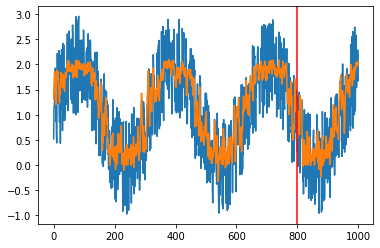

In [37]:
index = df.index.values
print(predicted.shape)
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show()